# Week 2-3
- By Manaswi
## Task: Duplicate Analysis

### Goal :
#### To analyze a collection of Duplicate entries from AcousticBrainz and identify which files are mislabeled.

DeDuplication is a problem in any fingerprint maintaining system. Multiple submissions made by people might be duplicates. In this case the duplicates have been identified and our job is to identify if any duplicate was mislabeled. Multiple versions of a song might exist obtained from different sources (different isssues, remastered, vinyl), and if a song is sufficiently different in its descriptors, it must be identified as a unique new entry. Out job here is to identify these unique entries mislabeled as duplicates.

# Lets Begin 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

import os
import numpy as np

currentPath = os.getcwd()
inputPath = os.path.join(currentPath,'ab-duplicates100-2016-03-02/')

#MAKE THESE DIRECTORIES IF THEY DONT EXIST
jsonPath = os.path.join(currentPath,'ab-duplicates100-2016-03-02-JSON/')
csvPath = os.path.join(currentPath,'ab-duplicates100-2016-03-02-CSV/')
outputPath = os.path.join(currentPath, 'ab-duplicates100-2016-03-02-Outputs')

# For the bigger dataset
#inputPath = os.path.join(currentPath,'ab-duplicates1000-2016-03-02/')

## Data

We have been given a set of json files. (one smaller version is used to run for prelimiary testing). Each folder represents a song and consists of all the json files from duplicate submissions made by users. Preprocessing these files, I will create csv files for each song that store the descriptors we are interested in.

* length
* bpm
* average loudness
* onset rate
* beat positions
* chords histogram
* hpcp mean
* key_key and key_scale
* replaygain
* tuning frequency

### Output
 - a list of MBID's for the unique (non duplicates) identified by our analysis.

### Pre Pre Processing the json files

It appears on investigating the folders in the datasets that our set of duplicates also might have multiple songs (muliple MBIDs) within them. So I do a pre pre processing to break these json folders into sub folders, such that each folder only has the duplicates of the same song submission. 

In [46]:
# YOU DONT NEED TO RUN THIS IF jsonPATH = ab-duplicates100-2016-03-02-JSON/ is already populated.
# If you want to run this, empty jsonPath = ab-duplicates100-2016-03-02-JSON/ and run this part of the code

# shutil is used for filehandling and copying file to different directory
import shutil

directories = []
for root, dirs, files in os.walk(inputPath):
    filenames = []
    for f in files:
        filename = f[0:3]
        #print filename
        filenames.append(str(filename))
    
    # This set consists of all the unique occurences in the list of filenames
    fileset = list(set(filenames))
    
    # Make a new set of sub directories in the jsonPath
    for f in fileset:
        
        #Before running this make sure that jsonPath is an empty directory that needs to be filled.
        os.mkdir(os.path.join(jsonPath,f))
        directories.append(f)
    
    for f in files:
        srcfile = os.path.join(inputPath,f[0:2],f)
        desfile = os.path.join(jsonPath,f[0:3],f)
        shutil.copy(srcfile,desfile)

We find after this pre pre processing step that from the initial list of 86 sub sets of duplicate files we now have the real number of 98 duplicate sets. This has been done on the 100 dataset. Same thing is done for the larger 1000 song dataset as well.

### PreProcessing to make CSV file
I am using essentia's json_to_csv.py to do the conversions. Collecting all the required descriptors for all the duplicate jsons into one csv file. I have copied the file essentia/src/examples/python/json_to_csv.py into the current folder for using in this project.

In [3]:
#Copy this file from essentia/src/examples/python/json_to_csv.py
import json_to_csv

for root, dirs, files in os.walk(jsonPath):
    
    jsonDuplicateFiles = []
    lengthDuplicates = 0
    
    for f in files:
        if f.lower().endswith((".json")):
            filename=f.split(".json")[0]
            jsonFileFullName = os.path.join(root,f)
            jsonDuplicateFiles.append(jsonFileFullName)
    
    csvFilename = os.path.join(csvPath,root.split("/")[-1] + ".csv")
    lengthDuplicates = len(jsonDuplicateFiles)
    
    includeList = ['metadata.audio_properties.length','metadata.audio_properties.replay_gain','rhythm.bpm', 'rhythm.onset_rate', 'lowlevel.average_loudness', 'tonal.key_key', 'tonal.key_scale', 'tonal.tuning_frequency']
    ignoreList = ['']

    includeListTemporal = ['rhythm.beats_position.*', 'tonal.chords_histogram.*', 'tonal.hpcp.mean.*']
    ignoreListTemporal = ['']

    #For testing on only one file
    #temp = [jsonFileFullName]
    json_to_csv.convert_all(jsonDuplicateFiles, csvFilename, includeList, ignoreList )

Writing to /home/manaswi/Documents/MissionPhd/MTG/ASPMALab/week2_3/ab-duplicates100-2016-03-02-CSV/.csv
Writing to /home/manaswi/Documents/MissionPhd/MTG/ASPMALab/week2_3/ab-duplicates100-2016-03-02-CSV/ebf.csv
Converting /home/manaswi/Documents/MissionPhd/MTG/ASPMALab/week2_3/ab-duplicates100-2016-03-02-JSON/ebf/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-34.json
Converting /home/manaswi/Documents/MissionPhd/MTG/ASPMALab/week2_3/ab-duplicates100-2016-03-02-JSON/ebf/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-29.json
Converting /home/manaswi/Documents/MissionPhd/MTG/ASPMALab/week2_3/ab-duplicates100-2016-03-02-JSON/ebf/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-74.json
Converting /home/manaswi/Documents/MissionPhd/MTG/ASPMALab/week2_3/ab-duplicates100-2016-03-02-JSON/ebf/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-14.json
Converting /home/manaswi/Documents/MissionPhd/MTG/ASPMALab/week2_3/ab-duplicates100-2016-03-02-JSON/ebf/ebfcb2ca-1285-4baf-8a9c-b09e737926d8-58.json
Converting /home/manaswi/Documents/MissionPh

### Now we have the CSV files

I divided the CSV files into two types, 
* single descriptive value (metadata.audio_properties.length','metadata.audio_properties.replay_gain','rhythm.bpm', 'rhythm.onset_rate', 'lowlevel.average_loudness', 'tonal.key_key', 'tonal.key_scale', 'tonal.tuning_frequency')
* temporally deccriptive vectors ('rhythm.beats_position.*', 'tonal.chords_histogram.*', 'tonal.hpcp.mean.*)

Here I experiment with just the single descriptive values to identify the unique elements in the given set of duplicates. (preliminary analysis). The vector descriptors need to be put in a different CSV file for comparison. (comparisons can be made on correlations on vectors like beat positions). But after my analysis I found that the single value descriptors were good enough to identify uniqueness of song.

## Comparing Duplicates

#### * Using single valued descriptors

In [21]:
import csv

descriptors = ['json_file_name','lowlevel.average_loudness','metadata.audio_properties.length','metadata.audio_properties.replay_gain','rhythm.bpm','rhythm.onset_rate','tonal.key_key','tonal.key_scale','tonal.tuning_frequency']
nDescriptors = len(descriptors)
index = 0

for root, dirs, files in os.walk(csvPath):
    for f in files:
        if f.lower().endswith((".csv")):
            print "comparing duplicates from ", f
            filename = os.path.join(csvPath,f)
                
            reader = csv.reader(open(filename,'rb'))
            
            # Skips the header of the CSV file
            reader.next()
        
            # Initializing all our descriptors to 0 for each duplicate set
            loudness = []
            length = []
            replay_gain = []
            bpm = []
            onset_rate = []
            key_key = []
            key_scale = []
            tuning_frequency = []
            filenames = []
            
            #Processing
            for row in reader:
                # Compare loudness
                filenames.append(row[0])
                loudness.append(row[1])
                length.append(row[2])
                replay_gain.append(row[3])
                bpm.append(row[4])
                onset_rate.append(row[5])
                key_key.append(row[6])
                key_scale.append(row[7])
                tuning_frequency.append(row[8])
            
            Filenames = np.array(filenames,dtype = "string")
                
            #Maintaining an array of Unique Status within each set of Duplicates. 1 = unique, 0 = duplicate
            sizeDuplicateSet = len(loudness)
            uniqueStatus = np.zeros((sizeDuplicateSet, nDescriptors), dtype = int)
        
            
            #Comparing 0. loudness
            Loudness = np.array(loudness, dtype = "single")
            m =  np.mean(Loudness)
            std = np.std(Loudness)
            indices = np.where(Loudness > m + std)
            if indices[0].size:
                for k in indices[0]:
                    uniqueStatus[k][0] = 1
            
            #Comparing 1. lengths
            Length = np.array(length, dtype = "single")
            m =  np.mean(Length)
            std = np.std(Length)
            indices = np.where(Length > m+20)
            
            if indices[0].size:
                for k in indices[0]:
                    uniqueStatus[k][1] = 1
        
        
            #Comparing 2. replay_gain
            ReplayGain = np.array(replay_gain, dtype = "single")
            m =  np.mean(ReplayGain)
            std = np.std(ReplayGain)
            
            indices = np.where(ReplayGain > m + std)
            if indices[0].size:
                for k in indices[0]:
                    uniqueStatus[k][2] = 1
        
            #Comparing 3. bpm
            Bpm = np.array(bpm, dtype = "single")
            m =  np.mean(Bpm)
            std = np.std(Bpm)
            
            indices = np.where(Bpm > m + std)
            if indices[0].size:
                for k in indices[0]:
                    uniqueStatus[k][3] = 1
            
            #Comparing 4. onset_rate
            OnsetRate = np.array(bpm, dtype = "single")
            m =  np.mean(OnsetRate)
            std = np.std(OnsetRate)
            
            indices = np.where(OnsetRate > m + std)
            if indices[0].size:
                for k in indices[0]:
                    uniqueStatus[k][4] = 1
        
            #Comparing 5. key_key
            KeyKey = np.array(key_key, dtype = "string")
            commonKey_key = max(set(key_key), key=key_key.count)
            indices = np.where(KeyKey != commonKey_key)
            
            if indices[0].size:
                for k in indices[0]:
                    uniqueStatus[k][5] = 1
            
            #Comparing 6. key_scale
            KeyScale = np.array(key_scale, dtype = "string")
            commonKey_scale = max(set(key_scale), key=key_scale.count)
            indices = np.where(KeyScale != commonKey_scale)
            
            if indices[0].size:
                for k in indices[0]:
                    uniqueStatus[k][6] = 1
            
            #Comparing 7. tuning_frequency
            TuningFreq = np.array(tuning_frequency, dtype = "single")
            m =  np.mean(TuningFreq)
            std = np.std(TuningFreq)
            indices = np.where(TuningFreq > m + std)
            
            if indices[0].size:
                for k in indices[0]:
                    uniqueStatus[k][7] = 1
                    
                    
            # CALCULATING CONFIDENCES AND WRITING TO FILE. (explained in the section below)
            outputFile = open(os.path.join(outputPath,f[0:3]),'w')
                              
            outputFile.write(f.split("/")[0])
            outputFile.write("\n Unique Non duplicates in this MBID are with their confidence (0-7) \n")
            for k in range(0,sizeDuplicateSet):
                confidence = sum(uniqueStatus[k][:])
                filename = Filenames[k].split("/")[-1]
                
                if confidence >= 3:
                    p = 1
                    outputFile.write(filename)
                    outputFile.write(" ")
                    outputFile.write(str(confidence))
                    outputFile.write("\n")
            outputFile.close()    
            #print "------------------------------"    

print "done comparing duplicates"

comparing duplicates from  f5f.csv
comparing duplicates from  867.csv
comparing duplicates from  5ad.csv
comparing duplicates from  b21.csv
comparing duplicates from  174.csv
comparing duplicates from  32c.csv
comparing duplicates from  14a.csv
comparing duplicates from  d05.csv
comparing duplicates from  917.csv
comparing duplicates from  0e0.csv
comparing duplicates from  424.csv
comparing duplicates from  568.csv
comparing duplicates from  6db.csv
comparing duplicates from  9ff.csv
comparing duplicates from  223.csv
comparing duplicates from  c7c.csv
comparing duplicates from  5e0.csv
comparing duplicates from  871.csv
comparing duplicates from  291.csv
comparing duplicates from  dcd.csv
comparing duplicates from  f2c.csv
comparing duplicates from  468.csv
comparing duplicates from  107.csv
comparing duplicates from  485.csv
comparing duplicates from  ac0.csv
comparing duplicates from  1f5.csv
comparing duplicates from  4f0.csv
comparing duplicates from  cc4.csv
comparing duplicates

### Calculating the non duplicates and a confidence on our prediction

In the previous step I have calculated a uniqueStatus matrix

This matrix is

*number of instances in a duplicate set X number of descriptors checked*

example = 73 X 8 (for the 9a5.csv)

A **False (0)** indicates that the descriptor for the particular instance is not unique and a **True (1)** indicates that it is unique (or sufficiently different from the other duplicates)

In the next step. I calculate a confidence from the number of **True** for each instance which gives a score for each instance to be a unique (non duplicate)

The scores and the unique non duplicate files are written into their respective duplicate set folders in outputs/ and the confidence score is a number (0-7), where 7 indicates all descriptors were unique, and 0 indicates no descriptors were unique.

### Results
Here are a few graphs to show what the typical descriptors for the duplicate sets looked like

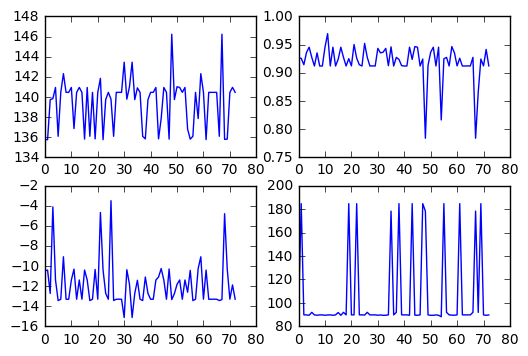

In [161]:
gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])

ax1.plot(Length)
ax2.plot(Loudness)
ax3.plot(ReplayGain)
ax4.plot(Bpm)

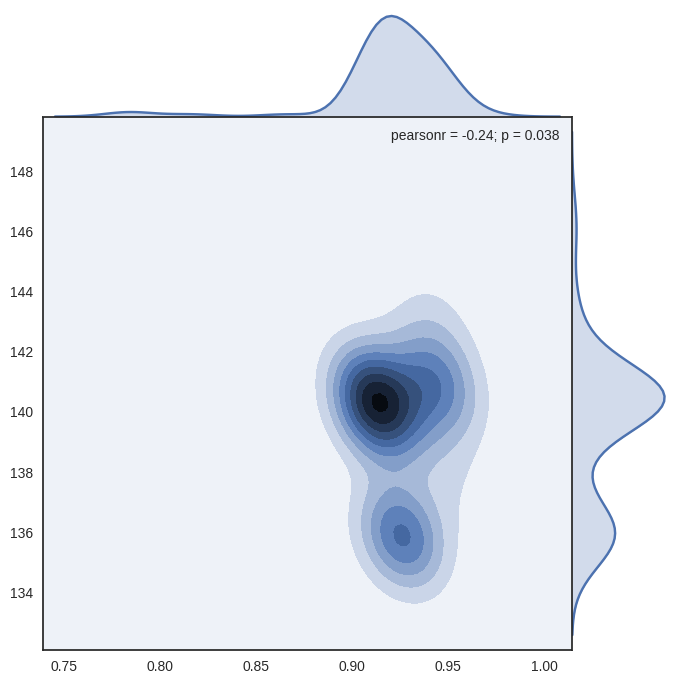

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(Loudness, Length, kind="kde", size=7, space=0)

Here I show with 2 of the descriptors how there are 2 different possible clusters of sound sources in these duplicates. The joint values of average Loudness and Length show that this duplicate set has 2 unique sound sources. This can be used to visualize the choice of descriptors to uiquely identify non duplicates.

# Conclusions :
I summarize my analysis and observations below:
* Folders were pre processed to make new duplicate set folders through script
* CSV files with required number of descriptors for each duplicate set were created
* CSV files were parsed and compared within the set to find outliers
* a uniqueStatus matrix was generated for each duplicate set that showed the uniqueness of the considered descriptors
* a Confidence measure was calculated for each identified non duplicate
* non duplicates and their respective condifence measures were written into a similar output directory structure for future parsing

## Descriptors analyzed :
* Outliers in Loudness, ReplayGain, BPM and OnsetRate were calculated using standard deviation distance from the mean of the values in our duplicate set
* Outliers in Key_key and Key_scale were selected by a max voting where the most common nominal value was considered the duplicate and deviations from it were marked as non duplicates.
* Outliers in Length were marked as those that varied more than 20 seconds from the mean of the collection of lengths in the duplicate set
* Outliers in tuningFrequency were marked as those that varied more than 5 Hz from the mean of the collection of frequencies in the duplicate set. This was chosen after looking at distributions in graphs as plotted above.

#### In this analysis, I have successfully identified unique non duplicates in a set of duplicate submissions from AcousticBrainz and developed a confidence measure on a collection of descriptors for the same. 

# Thank you.